In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

"Dry Bean," UCI Machine Learning Repository, 2020. [Online]. Available: https://doi.org/10.24432/C50S4B.

In [4]:
#Load in the data

cols = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRatio", "Eccentricity", "ConvexArea",
"EquivDiameter", "Extent", "Solidity", "Roundness", "Compactness", "ShapeFactor1", "ShapeFactor2", "ShapeFactor3", "ShapeFactor4", "Class"]

df = pd.read_excel("Dry_Bean_Dataset.xlsx", names=cols)

df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

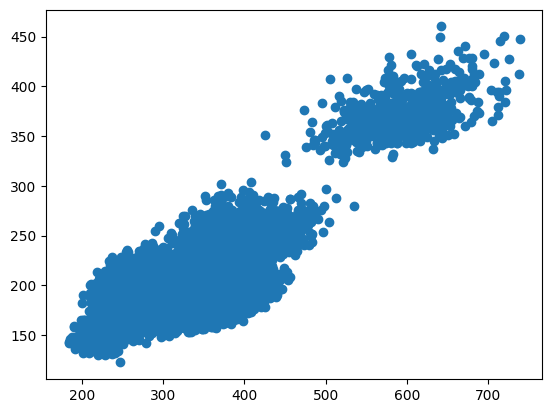

In [5]:
plt.scatter(df.MajorAxisLength, df.MinorAxisLength)

In [7]:
for i in range(len(cols)-1):
  for j in range(i+1, len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='Class')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Strategizing
Plotting the data shows some useful trends that can help to decide which approach/model will give the best results and which models will not be a good fit.

Since we have the classes in this dataset, it makes sense to use a supervised model.

Observations-

There are some plots where there is a lot of overlap between beans of different classes. If knn is used on these plots, the model will confuse different classes of beans and won't be a good fit

Bombay beans stick out pretty clearly on most of the plots.

ShapeFactor3 vs. ShapeFactor1 seems to have distinct regions of the graph where there is only one type of bean so let's use that for knn.



In [26]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [27]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [28]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [41]:
#I'm starting with 500 neighbors because most seeds have at least 500 entries
knn_model = KNeighborsClassifier(n_neighbors=500)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [42]:
y_pred = knn_model.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.95      0.86      0.91       259
      BOMBAY       1.00      1.00      1.00       105
        CALI       0.89      0.96      0.93       333
    DERMASON       0.93      0.88      0.91       671
       HOROZ       0.97      0.93      0.95       383
       SEKER       0.94      0.94      0.94       417
        SIRA       0.83      0.91      0.87       555

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



#Summary
As expected Bombay beans were very easy to pick out because they had very little overlap. There is a very low score for Sira beans and that's because there is overlap between Sira and most other bean types. Cali beans have a similar problem, but a little better than Sira.